# BoomBikes Linear Regression Assignment

**Problem Statement -**

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


**Business Goal-**

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

### Steps Followed in this exercise - 
* Data Understanding and Visualisation
* Data Preparation for modelling (cleaning, scaling, test-train split)
* Model Training
* Residual Analysis
* Model Evaluation and Prediction

## Step 1 - Data Understanding and Visualization

In [120]:
# importing libraries
#importing the required libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

Reading the data

In [121]:
df = pd.read_csv('day.csv')

In [122]:
# Looking at the data
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [123]:
# checking the shape of the data
df.shape

(730, 16)

_Data contains 730 rows and 16 columns_

In [124]:
# Checking the df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


_No column seems to contain any null value_

In [125]:
# verifying absence of null values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [126]:
# Checking the summary of the df
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


**Data Visualization**

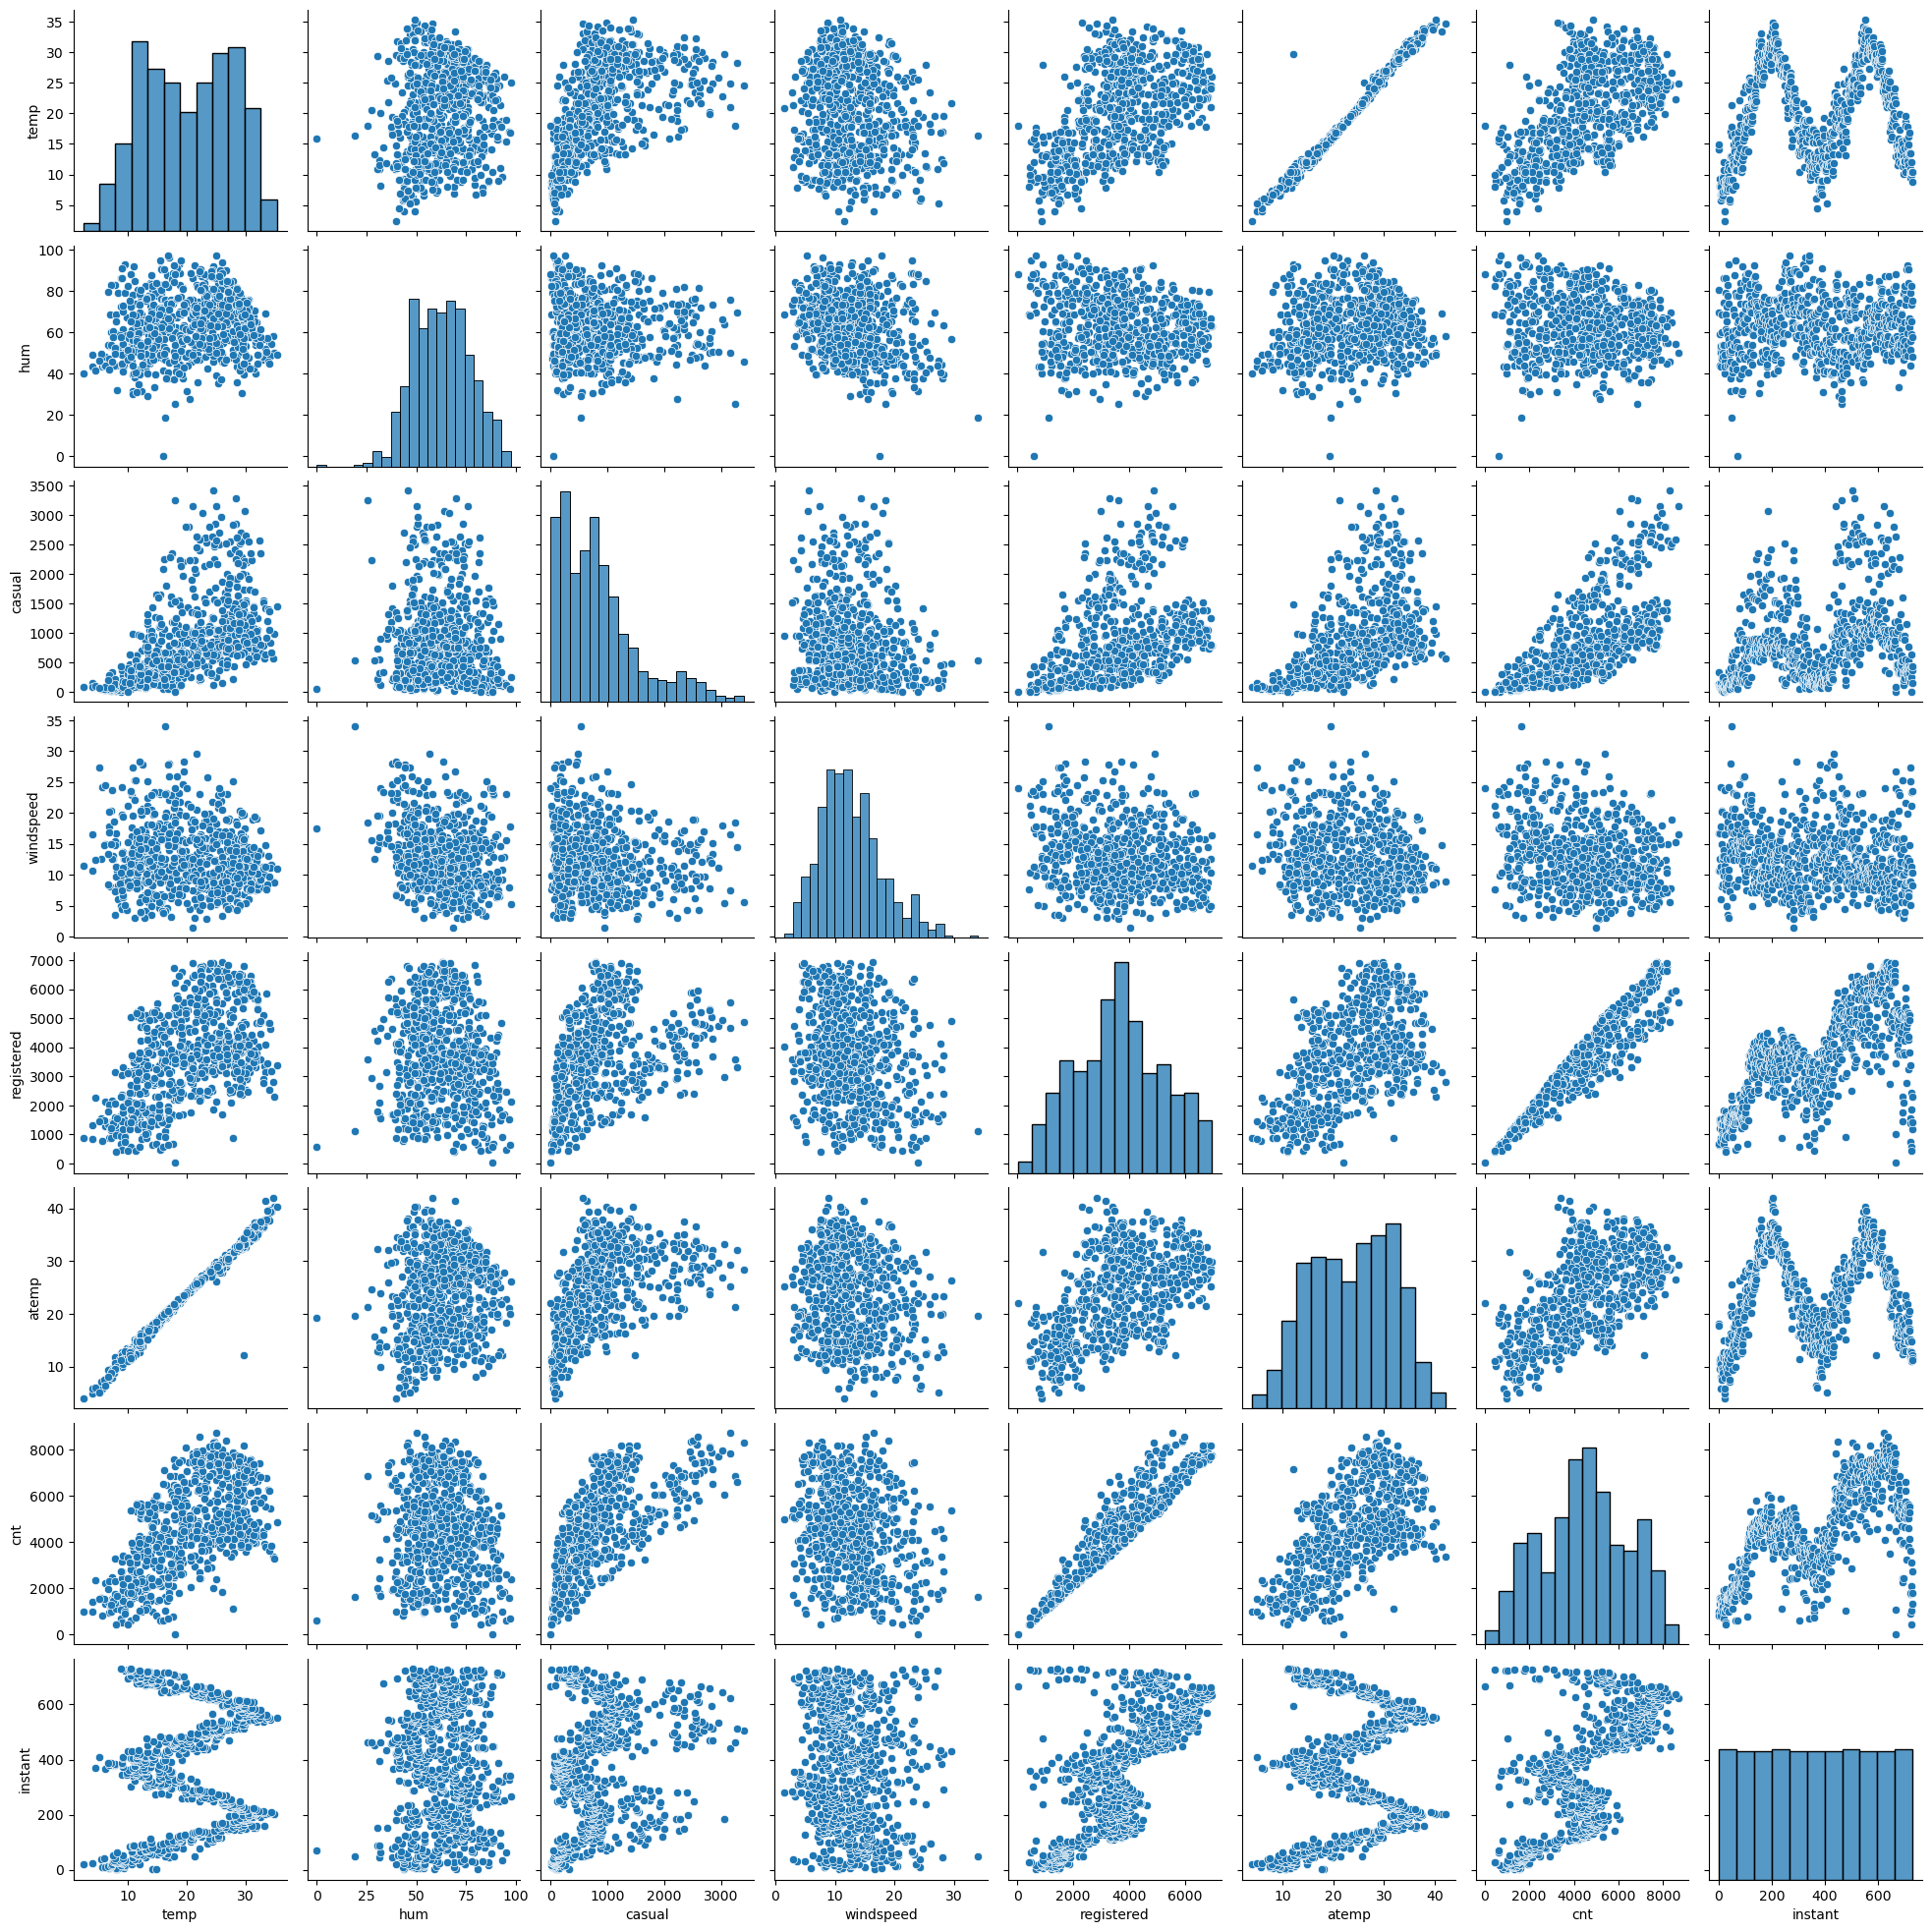

In [127]:
# Visualizing numeric data

sns.pairplot(df, vars = ["temp", "hum",'casual','windspeed','registered','atemp','cnt','instant'])
plt.show()

From the plots above, we can see that 'cnt' shows strong correlation with 'temp', 'atemp' and 'hum'.

In [128]:
# Replacing categorical variables with their subcategories for better visualization
df['season']=df.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
df['mnth']=df.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
df['weathersit']=df.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
df['weekday']=df.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


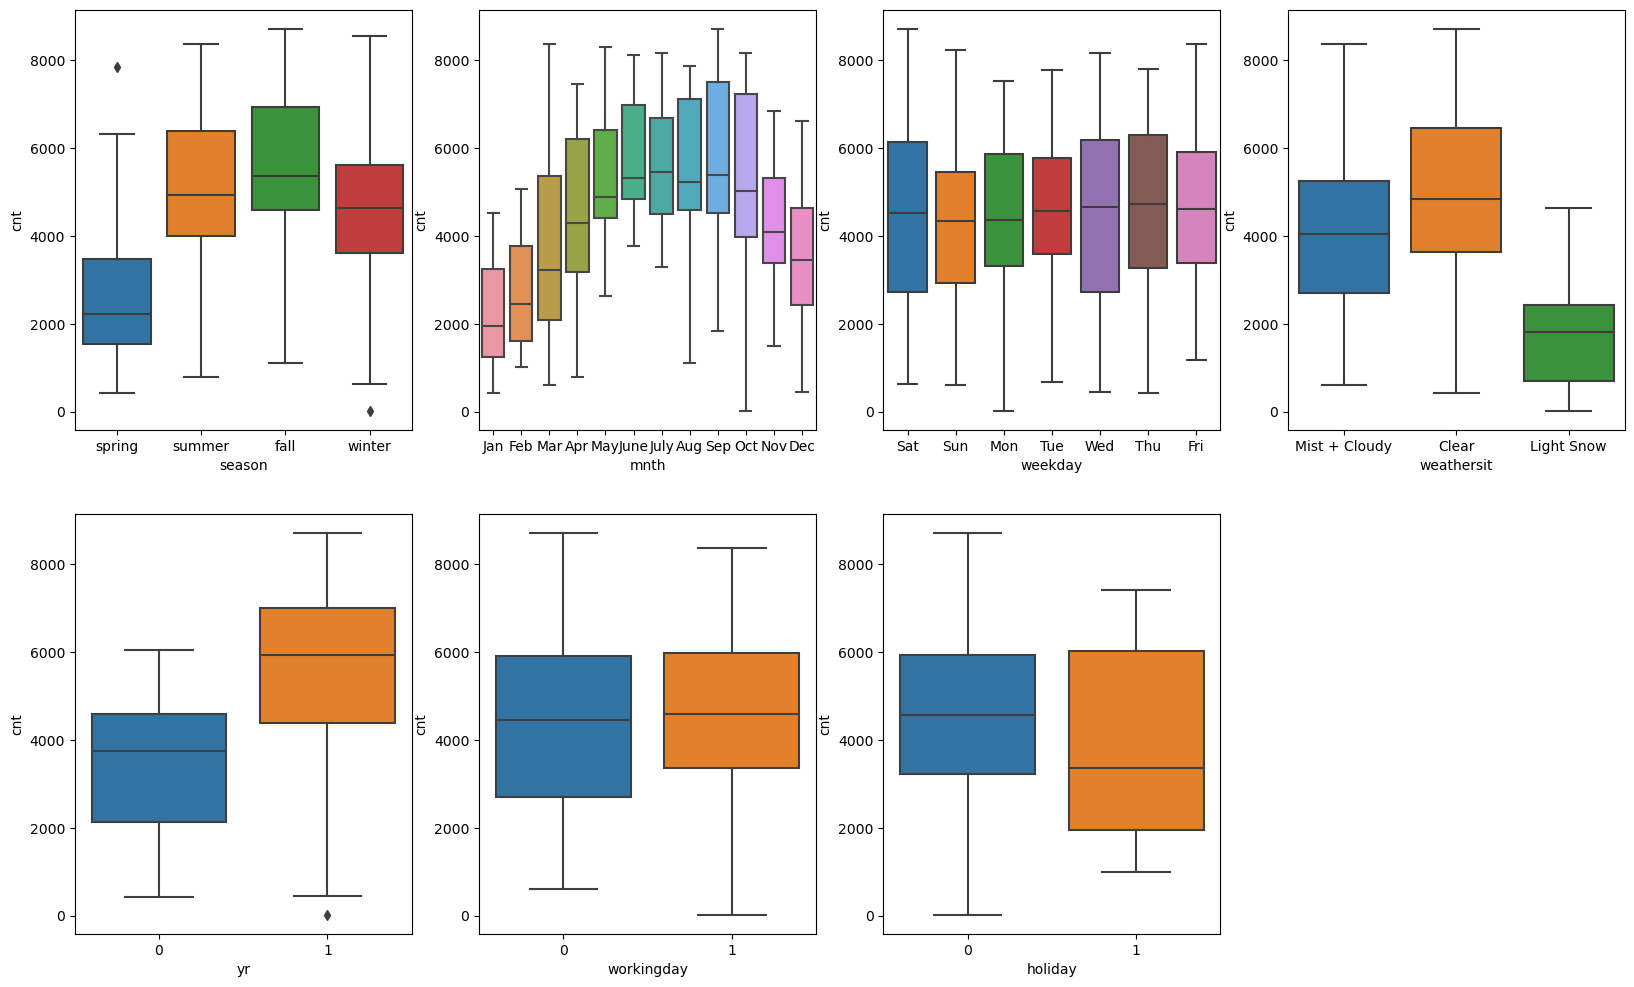

In [129]:
# Visualising categorical variables
plt.figure(figsize=(20,12))
plt.subplot(2, 4, 1)
sns.boxplot(x='season', y='cnt', data=df)
plt.subplot(2, 4, 2)
sns.boxplot(x='mnth', y='cnt', data=df)
plt.subplot(2, 4, 3)
sns.boxplot(x='weekday', y='cnt', data=df)
plt.subplot(2, 4, 4)
sns.boxplot(x='weathersit', y='cnt', data=df)
plt.subplot(2, 4, 5)
sns.boxplot(x='yr', y='cnt', data=df)
plt.subplot(2, 4, 6)
sns.boxplot(x='workingday', y='cnt', data=df)
plt.subplot(2, 4, 7)
sns.boxplot(x='holiday', y='cnt', data=df)
plt.show()

From the plots above we can make the following observations -
* People are more likely to rent a bike in summer and fall
* People are least likely to rent a bike in spring
* Bike rentals start to increase in Feb, peak in September/October and then start to fall from November
* Most bike rentals take place in the clear weather
* More bikes were rented in 2019
* There is no big discernable difference in bike rental rates depending on whether it's a working day or not
* Bike rental rates are higher on holidays

## Step 2 - Data Preparation

In [130]:
#dropping the variables atemp, instant, dteday, casual, registered as they are not needed for the analysis

df = df.drop(['atemp', 'instant', 'dteday', 'casual', 'registered'], axis=1)
df.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


In [131]:
#checking the shape of the resulting dataset
df.shape

(730, 11)

In [132]:
#checking the description of the resulting dataset
df.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.465405,7.506729,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,97.250000,34.000021,8714.000000


In [133]:
#checking the info of the resulting dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


In [134]:
#creating dummy variables for the variables of month, weekday, weathersit, seasons

month = pd.get_dummies(df.mnth, drop_first=True)
weekday = pd.get_dummies(df.weekday, drop_first=True)
weathersit = pd.get_dummies(df.weathersit, drop_first=True)
season = pd.get_dummies(df.season, drop_first=True)
df = pd.concat([df,month, weekday, weathersit, season], axis=1)
df.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,...,1,0,0,0,0,0,1,1,0,0
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,...,0,1,0,0,0,0,1,1,0,0
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,...,0,0,0,1,0,0,0,1,0,0
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,...,0,0,0,0,1,0,0,1,0,0


In [135]:
# dropping the variables season,mnth,weekday,weathersit as we have created the dummies for it
df.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)
df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
0,0,0,0,14.110847,80.5833,10.749882,985,0,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,0,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [136]:
#checking the shape of the resulting dataset
df.shape

(730, 29)

In [137]:
#checking the description of the resulting dataset
df.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,62.765175,12.763620,4508.006849,0.084932,0.084932,0.076712,...,0.143836,0.143836,0.142466,0.142466,0.141096,0.028767,0.336986,0.246575,0.252055,0.243836
std,0.500343,0.167266,0.465405,7.506729,14.237589,5.195841,1936.011647,0.278971,0.278971,0.266317,...,0.351164,0.351164,0.349767,0.349767,0.348359,0.167266,0.473004,0.431313,0.434490,0.429689
min,0.000000,0.000000,0.000000,2.424346,0.000000,1.500244,22.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,52.000000,9.041650,3169.750000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,62.625000,12.125325,4548.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,72.989575,15.625589,5966.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,97.250000,34.000021,8714.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [138]:
#checking the info of the resulting dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yr             730 non-null    int64  
 1   holiday        730 non-null    int64  
 2   workingday     730 non-null    int64  
 3   temp           730 non-null    float64
 4   hum            730 non-null    float64
 5   windspeed      730 non-null    float64
 6   cnt            730 non-null    int64  
 7   Aug            730 non-null    uint8  
 8   Dec            730 non-null    uint8  
 9   Feb            730 non-null    uint8  
 10  Jan            730 non-null    uint8  
 11  July           730 non-null    uint8  
 12  June           730 non-null    uint8  
 13  Mar            730 non-null    uint8  
 14  May            730 non-null    uint8  
 15  Nov            730 non-null    uint8  
 16  Oct            730 non-null    uint8  
 17  Sep            730 non-null    uint8  
 18  Mon       

In [139]:
#splitting the dataset into train and test sets
df_train, df_test = train_test_split(df, train_size=0.7, random_state=100)

In [140]:
#checking the shape of the training dataset
df_train.shape

(510, 29)

In [141]:
#checking the shape of the test dataset
df_test.shape

(220, 29)

In [142]:
# rescaling the variables hum, temp, windspeed and cnt as they have large values as compared to the other variables of the dataset

scaler = MinMaxScaler()
scaler_var = ['hum', 'windspeed', 'temp', 'cnt']
df_train[scaler_var] = scaler.fit_transform(df_train[scaler_var])

In [143]:
#checking the normalized values of the train set after performing scaling 
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499,0.096078,0.084314,0.066667,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421,0.294988,0.278131,0.249689,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


As we can see, the max value of all columns is 1 which is an indication that our rescaling process has worked

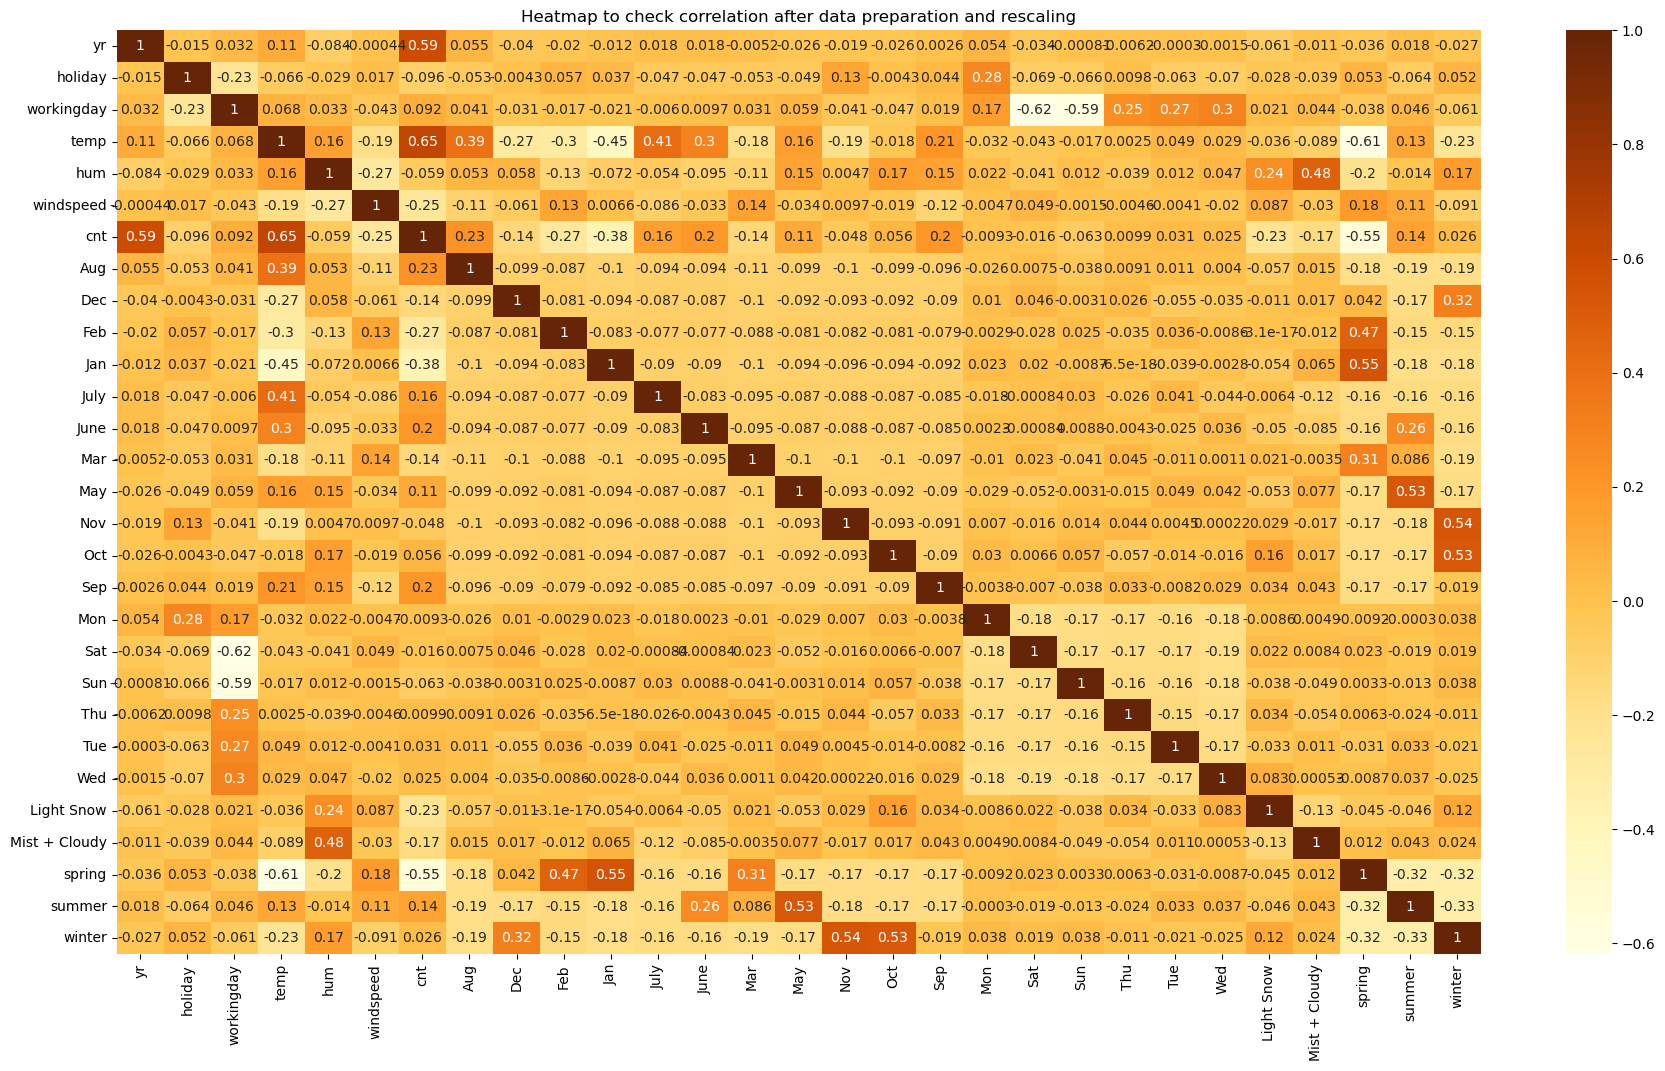

In [144]:
# checking the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (22, 12))
sns.heatmap(df_train.corr(), cmap="YlOrBr", annot=True)
plt.title('Heatmap to check correlation after data preparation and rescaling')
plt.show()

## Step 3 - Model Training

### Manual Approach

In [145]:
#preparing the variables for model building 

y_train = df_train.pop('cnt')
X_train = df_train

In [146]:
# Building the first model using 'temp' since it has the highest correlation with 'cnt'

# add a constant (intercept)
X_train_sm = sm.add_constant(X_train['temp'])

# creating first model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# params
lr_model.params

const    0.169031
temp     0.640944
dtype: float64

In [147]:
#checking model summary 
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.0
Date:                Wed, 14 Jun 2023   Prob (F-statistic):           2.46e-61
Time:                        20:52:53   Log-Likelihood:                 176.09
No. Observations:                 510   AIC:                            -348.2
Df Residuals:                     508   BIC:                            -339.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1690      0.020      8.608      0.000       0.130       0.208
temp           0.6409      0.034     19.026      0.000       0.575       0.707
==============================================================================
Omnibus:                        6.355   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                4.521
Skew:                           0.088   Prob(JB):                        0.104
Kurtosis:                       2.574   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared is 0.416 which means 41% of the variance in the 'cnt' is explained by 'temp'

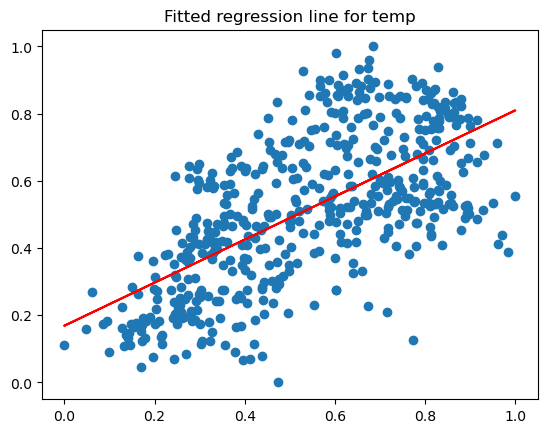

In [148]:
#visualising our findings
plt.scatter(X_train_sm.iloc[:, 1], y_train)
plt.plot(X_train_sm.iloc[:, 1], 0.1690 + 0.6409*X_train_sm.iloc[:, 1], 'r')
plt.title('Fitted regression line for temp')
plt.show()

In [149]:
# adding variable 'yr' to improve the R-squared

X_train_sm = X_train[['temp', 'yr']]
X_train_sm = sm.add_constant(X_train_sm)

# creating second model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# params
lr_model.params

const    0.079266
temp     0.584266
yr       0.236739
dtype: float64

In [150]:
# checking summary with temp and yr as selected variables
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     568.2
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          3.34e-130
Time:                        20:52:53   Log-Likelihood:                 338.80
No. Observations:                 510   AIC:                            -671.6
Df Residuals:                     507   BIC:                            -658.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0793      0.015      5.321      0.000       0.050       0.109
temp           0.5843      0.025     23.698      0.000       0.536       0.633
yr             0.2367      0.011     21.276      0.000       0.215       0.259
==============================================================================
Omnibus:                       32.310   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.054
Skew:                          -0.513   Prob(JB):                     2.71e-10
Kurtosis:                       4.010   Cond. No.                         6.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared is now .692 which means 69% of the variance in the 'cnt' is explained by 'temp' and 'yr' data

In [151]:
# adding all variables and finding out the R-squared values
# building model with all variables
X_train_sm = sm.add_constant(X_train)

# create third model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# params
lr_model.params

const            0.243106
yr               0.232438
holiday          0.010042
workingday       0.096177
temp             0.445359
hum             -0.151473
windspeed       -0.186010
Aug              0.020376
Dec             -0.044277
Feb             -0.032441
Jan             -0.063315
July            -0.033848
June             0.004602
Mar              0.001274
May              0.024673
Nov             -0.039879
Oct              0.007546
Sep              0.085938
Mon             -0.020931
Sat              0.095554
Sun              0.041333
Thu             -0.009131
Tue             -0.017931
Wed             -0.005495
Light Snow      -0.255835
Mist + Cloudy   -0.059551
spring          -0.044834
summer           0.043002
winter           0.107632
dtype: float64

In [152]:
# checking summary with all the variables
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          3.00e-181
Time:                        20:52:53   Log-Likelihood:                 527.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     482   BIC:                            -879.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2431      0.035      6.888      0.000       0.174       0.312
yr                0.2324      0.008     28.819      0.000       0.217       0.248
holiday           0.0100      0.024      0.418      0.676      -0.037       0.057
workingday        0.0962      0.012      7.835      0.000       0.072       0.120
temp              0.4454      0.046      9.628      0.000       0.354       0.536
hum              -0.1515      0.039     -3.929      0.000      -0.227      -0.076
windspeed        -0.1860      0.026     -7.226      0.000      -0.237      -0.135
Aug               0.0204      0.034      0.607      0.544      -0.046       0.086
Dec              -0.0443      0.034     -1.317      0.189      -0.110       0.022
Feb              -0.0324      0.033     -0.985      0.325      -0.097       0.032
Jan              -0.0633      0.034     -1.885      0.060      -0.129       0.003
July             -0.0338      0.035     -0.969      0.333      -0.102       0.035
June              0.0046      0.025      0.186      0.853      -0.044       0.053
Mar               0.0013      0.025      0.052      0.959      -0.047       0.050
May               0.0247      0.021      1.173      0.241      -0.017       0.066
Nov              -0.0399      0.036     -1.096      0.274      -0.111       0.032
Oct               0.0075      0.036      0.210      0.834      -0.063       0.078
Sep               0.0859      0.032      2.692      0.007       0.023       0.149
Mon              -0.0209      0.015     -1.365      0.173      -0.051       0.009
Sat               0.0956      0.014      6.958      0.000       0.069       0.123
Sun               0.0413      0.014      2.964      0.003       0.014       0.069
Thu              -0.0091      0.016     -0.588      0.557      -0.040       0.021
Tue              -0.0179      0.016     -1.156      0.248      -0.048       0.013
Wed              -0.0055      0.015     -0.368      0.713      -0.035       0.024
Light Snow       -0.2558      0.026     -9.699      0.000      -0.308      -0.204
Mist + Cloudy    -0.0596      0.010     -5.709      0.000      -0.080      -0.039
spring           -0.0448      0.030     -1.496      0.135      -0.104       0.014
summer            0.0430      0.026      1.645      0.101      -0.008       0.094
winter            0.1076      0.028      3.853      0.000       0.053       0.163
==============================================================================
Omnibus:                       83.722   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.841
Skew:                          -0.799   Prob(JB):                     4.53e-51
Kurtosis:                       5.891   Cond. No.                     6.88e+15
================================================================

R-squared is now .853 which means 85% of the variance in the count quantity is explained with all the variables.

### Automated Approach

In [195]:
# checking the number of columns in our dataset
len(df.columns)

29

In [196]:
# creating the RFE object
lm = LinearRegression()
lm.fit(X_train, y_train)

# setting feature selection variables to 15
rfe = RFE(lm, n_features_to_select = 15) 

# fitting rfe ofject on our training dataset
rfe = rfe.fit(X_train, y_train)

In [197]:
# Analysing the features selected and the ones rejected in a list after rfe
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Aug', False, 6),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 13),
 ('Mar', False, 14),
 ('May', False, 5),
 ('Nov', False, 2),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Mon', False, 8),
 ('Sat', True, 1),
 ('Sun', False, 7),
 ('Thu', False, 10),
 ('Tue', False, 9),
 ('Wed', False, 11),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [198]:
# getting the selected feature variables in one one variable
true_rfe = X_train.columns[rfe.support_]

In [199]:
# checking the values of true_rfe
true_rfe

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Jan',
       'July', 'Sep', 'Sat', 'Light Snow', 'Mist + Cloudy', 'spring', 'summer',
       'winter'],
      dtype='object')

In [200]:
len(true_rfe)

15

In [201]:
# building model using selected RFE variables
# creating training set with RFE selected variables
X_train_rfe = X_train[true_rfe]

In [202]:
# adding constant to training variable
X_train_rfe = sm.add_constant(X_train_rfe)

# creating first training model with rfe selected variables
lr = sm.OLS(y_train, X_train_rfe)

# fit
lr_model = lr.fit()

# params
lr_model.params

const            0.251893
yr               0.230527
holiday         -0.058173
workingday       0.043335
temp             0.509619
hum             -0.156299
windspeed       -0.186259
Jan             -0.034512
July            -0.052918
Sep              0.081395
Sat              0.053552
Light Snow      -0.247464
Mist + Cloudy   -0.056318
spring          -0.050897
summer           0.050762
winter           0.093301
dtype: float64

In [203]:
# summary of model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          4.22e-191
Time:                        20:57:03   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2519      0.036      6.969      0.000       0.181       0.323
yr                0.2305      0.008     28.795      0.000       0.215       0.246
holiday          -0.0582      0.027     -2.164      0.031      -0.111      -0.005
workingday        0.0433      0.012      3.762      0.000       0.021       0.066
temp              0.5096      0.034     14.837      0.000       0.442       0.577
hum              -0.1563      0.037     -4.188      0.000      -0.230      -0.083
windspeed        -0.1863      0.025     -7.310      0.000      -0.236      -0.136
Jan              -0.0345      0.017     -1.989      0.047      -0.069      -0.000
July             -0.0529      0.018     -2.931      0.004      -0.088      -0.017
Sep               0.0814      0.016      4.945      0.000       0.049       0.114
Sat               0.0536      0.014      3.694      0.000       0.025       0.082
Light Snow       -0.2475      0.026     -9.507      0.000      -0.299      -0.196
Mist + Cloudy    -0.0563      0.010     -5.439      0.000      -0.077      -0.036
spring           -0.0509      0.021     -2.464      0.014      -0.091      -0.010
summer            0.0508      0.015      3.423      0.001       0.022       0.080
winter            0.0933      0.017      5.403      0.000       0.059       0.127
==============================================================================
Omnibus:                       66.260   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.826
Skew:                          -0.678   Prob(JB):                     1.97e-35
Kurtosis:                       5.383   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [204]:
# checking the VIF of the model 

# dropping the constant variables from the dataset
X_train_rfe = X_train_rfe.drop(['const'], axis = 1)


In [205]:
# calculating the VIF of the model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
4,hum,29.37
3,temp,17.78
2,workingday,5.31
5,windspeed,4.73
12,spring,4.53
14,winter,3.46
13,summer,2.85
11,Mist + Cloudy,2.29
0,yr,2.09
9,Sat,1.98


In [206]:
# 'hum' variable can be dropped due to high VIF
X_train_new_1 = X_train_rfe.drop(['hum'], axis = 1)

In [207]:
# adding constant to training variable
X_train_lr1 = sm.add_constant(X_train_new_1)

# creating first training model with rfe selected variables
lr = sm.OLS(y_train, X_train_lr1)

# fit
lr_model = lr.fit()

# summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          1.60e-188
Time:                        20:57:05   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1737      0.031      5.520      0.000       0.112       0.235
yr                0.2345      0.008     29.009      0.000       0.219       0.250
holiday          -0.0558      0.027     -2.042      0.042      -0.109      -0.002
workingday        0.0464      0.012      3.966      0.000       0.023       0.069
temp              0.4722      0.034     14.005      0.000       0.406       0.538
windspeed        -0.1563      0.025     -6.286      0.000      -0.205      -0.107
Jan              -0.0392      0.018     -2.227      0.026      -0.074      -0.005
July             -0.0479      0.018     -2.614      0.009      -0.084      -0.012
Sep               0.0755      0.017      4.527      0.000       0.043       0.108
Sat               0.0583      0.015      3.968      0.000       0.029       0.087
Light Snow       -0.2908      0.024    -11.977      0.000      -0.339      -0.243
Mist + Cloudy    -0.0813      0.009     -9.437      0.000      -0.098      -0.064
spring           -0.0599      0.021     -2.867      0.004      -0.101      -0.019
summer            0.0445      0.015      2.967      0.003       0.015       0.074
winter            0.0784      0.017      4.562      0.000       0.045       0.112
==============================================================================
Omnibus:                       67.830   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.565
Skew:                          -0.692   Prob(JB):                     1.84e-36
Kurtosis:                       5.415   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [208]:
# checking the VIF of the model 

# dropping the constant variables from the dataset
X_train_lr1 = X_train_lr1.drop(['const'], axis = 1)

In [209]:
# calculating the VIF of the model
vif = pd.DataFrame()
X = X_train_new_1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.68
11,spring,3.07
12,summer,2.34
0,yr,2.08
13,winter,1.98
8,Sat,1.97
5,Jan,1.62
6,July,1.59


'temp' has a high VIF but also has a high coeff value, so we should not remove that.


'workingday' however, has a VIF > 5 and a low coeff value, so it can be removed.

In [210]:
# 'workingday' variable can be dropped due to high VIF
X_train_new_2 = X_train_new_1.drop(['workingday'], axis = 1)

In [211]:
# adding constant to training variable
X_train_lr2 = sm.add_constant(X_train_new_2)

# creating first training model with rfe selected variables
lr = sm.OLS(y_train, X_train_lr2)

# fit
lr_model = lr.fit()

# summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.1
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          2.48e-186
Time:                        20:57:16   Log-Likelihood:                 502.77
No. Observations:                 510   AIC:                            -977.5
Df Residuals:                     496   BIC:                            -918.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2120      0.030      6.978      0.000       0.152       0.272
yr                0.2347      0.008     28.620      0.000       0.219       0.251
holiday          -0.0934      0.026     -3.589      0.000      -0.144      -0.042
temp              0.4734      0.034     13.837      0.000       0.406       0.541
windspeed        -0.1570      0.025     -6.226      0.000      -0.207      -0.107
Jan              -0.0386      0.018     -2.159      0.031      -0.074      -0.003
July             -0.0508      0.019     -2.735      0.006      -0.087      -0.014
Sep               0.0762      0.017      4.504      0.000       0.043       0.109
Sat               0.0201      0.011      1.787      0.075      -0.002       0.042
Light Snow       -0.2859      0.025    -11.619      0.000      -0.334      -0.238
Mist + Cloudy    -0.0794      0.009     -9.097      0.000      -0.097      -0.062
spring           -0.0615      0.021     -2.902      0.004      -0.103      -0.020
summer            0.0437      0.015      2.871      0.004       0.014       0.074
winter            0.0755      0.017      4.334      0.000       0.041       0.110
==============================================================================
Omnibus:                       66.209   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.692
Skew:                          -0.716   Prob(JB):                     1.03e-31
Kurtosis:                       5.160   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [212]:
# checking the VIF of the model 

# dropping the constant variables from the dataset
X_train_lr2 = X_train_lr2.drop(['const'], axis = 1)

In [213]:
# calculating the VIF of the model
vif = pd.DataFrame()
X = X_train_new_2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,5.16
3,windspeed,4.64
10,spring,2.76
11,summer,2.24
0,yr,2.07
12,winter,1.80
4,Jan,1.61
5,July,1.59
9,Mist + Cloudy,1.56
6,Sep,1.34


'Jan' can be dropped due to negative correlation with 'cnt' and high p -value

In [214]:
#'jan' variable can be dropped
X_train_new_3 = X_train_lr2.drop(['Jan'], axis = 1)

In [215]:
#adding constant to training variable
X_train_lr3 = sm.add_constant(X_train_new_3)

#creating first training model with rfe selected variables
lr = sm.OLS(y_train, X_train_lr3)

#fit
lr_model = lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.6
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          1.68e-186
Time:                        21:02:37   Log-Likelihood:                 500.38
No. Observations:                 510   AIC:                            -974.8
Df Residuals:                     497   BIC:                            -919.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1960      0.030      6.628      0.000       0.138       0.254
yr                0.2340      0.008     28.451      0.000       0.218       0.250
holiday          -0.0941      0.026     -3.605      0.000      -0.145      -0.043
temp              0.4924      0.033     14.839      0.000       0.427       0.558
windspeed        -0.1500      0.025     -5.974      0.000      -0.199      -0.101
July             -0.0525      0.019     -2.820      0.005      -0.089      -0.016
Sep               0.0766      0.017      4.515      0.000       0.043       0.110
Sat               0.0199      0.011      1.761      0.079      -0.002       0.042
Light Snow       -0.2846      0.025    -11.529      0.000      -0.333      -0.236
Mist + Cloudy    -0.0803      0.009     -9.176      0.000      -0.097      -0.063
spring           -0.0670      0.021     -3.174      0.002      -0.108      -0.026
summer            0.0468      0.015      3.078      0.002       0.017       0.077
winter            0.0816      0.017      4.733      0.000       0.048       0.115
==============================================================================
Omnibus:                       65.293   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.851
Skew:                          -0.706   Prob(JB):                     2.60e-31
Kurtosis:                       5.152   Cond. No.                         17.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [216]:
#checking the VIF of the model 

#dropping the constant variables from the dataset
X_train_lr3 = X_train_lr3.drop(['const'], axis = 1)

In [217]:
#calculating the VIF of the model
vif = pd.DataFrame()
X = X_train_new_3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,5.12
3,windspeed,4.62
10,summer,2.23
9,spring,2.10
0,yr,2.07
11,winter,1.79
4,July,1.58
8,Mist + Cloudy,1.55
5,Sep,1.34
6,Sat,1.19


'Sat' has a high p-value and can be removed

In [218]:
X_train_new_4 = X_train_lr3.drop(['Sat'], axis = 1)

In [219]:
#adding constant to training variable
X_train_lr4 = sm.add_constant(X_train_new_4)

#creating first training model with rfe selected variables
lr = sm.OLS(y_train, X_train_lr4)

#fit
lr_model = lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          5.06e-187
Time:                        21:04:19   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1994      0.030      6.746      0.000       0.141       0.258
yr                0.2336      0.008     28.352      0.000       0.217       0.250
holiday          -0.0975      0.026     -3.736      0.000      -0.149      -0.046
temp              0.4910      0.033     14.770      0.000       0.426       0.556
windspeed        -0.1479      0.025     -5.887      0.000      -0.197      -0.099
July             -0.0521      0.019     -2.790      0.005      -0.089      -0.015
Sep               0.0768      0.017      4.517      0.000       0.043       0.110
Light Snow       -0.2842      0.025    -11.487      0.000      -0.333      -0.236
Mist + Cloudy    -0.0802      0.009     -9.146      0.000      -0.097      -0.063
spring           -0.0672      0.021     -3.175      0.002      -0.109      -0.026
summer            0.0465      0.015      3.051      0.002       0.017       0.076
winter            0.0817      0.017      4.730      0.000       0.048       0.116
==============================================================================
Omnibus:                       59.182   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.016
Skew:                          -0.629   Prob(JB):                     7.92e-30
Kurtosis:                       5.173   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [220]:

#checking the VIF of the model 

#dropping the constant variables from the dataset
X_train_lr4 = X_train_lr4.drop(['const'], axis = 1)

In [221]:
#calculating the VIF of the model
vif = pd.DataFrame()
X = X_train_new_4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,5.09
3,windspeed,4.60
9,summer,2.23
8,spring,2.08
0,yr,2.07
10,winter,1.78
4,July,1.58
7,Mist + Cloudy,1.55
5,Sep,1.34
6,Light Snow,1.08


In [222]:
#July is dropped because of negative correlation and the p-value
X_train_new_5 = X_train_lr4.drop(['July'], axis = 1)

In [223]:
#adding constant to training variable
X_train_lr5 = sm.add_constant(X_train_new_5)

#creating first training model with rfe selected variables
lr = sm.OLS(y_train, X_train_lr5)

#fit
lr_model = lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          1.47e-186
Time:                        21:06:13   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1909      0.030      6.447      0.000       0.133       0.249
yr                0.2341      0.008     28.237      0.000       0.218       0.250
holiday          -0.0963      0.026     -3.668      0.000      -0.148      -0.045
temp              0.4777      0.033     14.423      0.000       0.413       0.543
windspeed        -0.1481      0.025     -5.854      0.000      -0.198      -0.098
Sep               0.0910      0.016      5.566      0.000       0.059       0.123
Light Snow       -0.2850      0.025    -11.444      0.000      -0.334      -0.236
Mist + Cloudy    -0.0787      0.009     -8.938      0.000      -0.096      -0.061
spring           -0.0554      0.021     -2.654      0.008      -0.096      -0.014
summer            0.0621      0.014      4.350      0.000       0.034       0.090
winter            0.0945      0.017      5.630      0.000       0.062       0.127
==============================================================================
Omnibus:                       63.413   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.384
Skew:                          -0.674   Prob(JB):                     1.21e-31
Kurtosis:                       5.210   Cond. No.                         17.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [224]:
#checking the VIF of the model 

#dropping the constant variables from the dataset
X_train_lr5 = X_train_lr5.drop(['const'], axis = 1)

In [225]:
#calculating the VIF of the model
vif = pd.DataFrame()
X = X_train_new_5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,windspeed,4.60
2,temp,3.84
0,yr,2.07
7,spring,1.99
8,summer,1.90
9,winter,1.63
6,Mist + Cloudy,1.55
4,Sep,1.23
5,Light Snow,1.08
1,holiday,1.04


Selecting this as the final model

## Step 4 - Residual Analysis

In [226]:
X_train_lr5 = sm.add_constant(X_train_lr5)
X_train_lr5

,const,yr,holiday,temp,windspeed,Sep,Light Snow,Mist + Cloudy,spring,summer,winter
576,1.0,1,0,0.815169,0.264686,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,0,1,1,0,0
728,1.0,1,0,0.245101,0.663106,0,0,0,1,0,0
482,1.0,1,0,0.395666,0.188475,0,0,1,0,1,0
111,1.0,0,0,0.345824,0.380981,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0.187140,0,0,0,0,0,0
53,1.0,0,0,0.202618,0.111379,0,0,0,1,0,0
350,1.0,0,0,0.248216,0.431816,0,0,1,0,0,1
79,1.0,0,0,0.462664,0.529881,0,0,1,0,1,0


In [227]:
#getting the y_train_pred for residual analysis
y_train_pred = lr_model.predict(X_train_lr5)

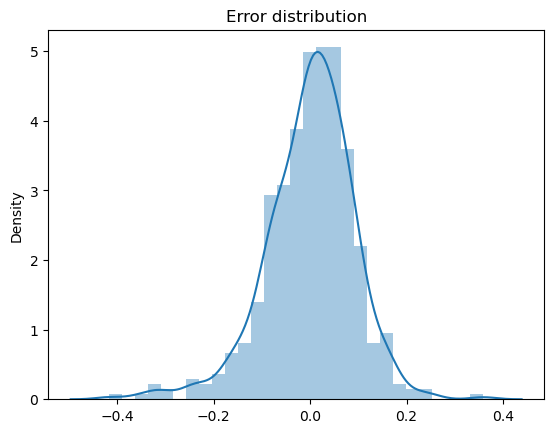

In [228]:
res = y_train - y_train_pred
#distribution of the error terms shown here; distribution should be centered around 0 and should be a normal distribution
sns.distplot(res)
plt.title('Error distribution')
plt.show()

### Making Predictions on the Test set

In [229]:
#perform standardization (MinMax scaling) on test set
#checking the variables to be standardized
scaler_var

['hum', 'windspeed', 'temp', 'cnt']

In [230]:
#perform scaling on test data set
#train dataset is to be fit, test dataset is not fit but simply transformed
#test dataset is transformed based on fit of train dataset
df_test[scaler_var] = scaler.transform(df_test[scaler_var])

In [232]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.638221,0.313293,0.522154,0.059091,0.086364,0.100000,...,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.459303,0.233187,0.148694,0.159584,0.219163,0.236333,0.281541,0.300684,...,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [233]:
#building test model using the variable temp
#preparing the variables for model building 

y_test = df_test.pop('cnt')
X_test = df_test

In [234]:
#checking the values
y_test.head(5)

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64

In [235]:
X_test.head(5)

,yr,holiday,workingday,temp,hum,windspeed,Aug,Dec,Feb,Jan,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
184,0,1,0,0.831783,0.657364,0.084219,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.610133,0.153728,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.837699,0.334206,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.314298,0.537414,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [236]:
#Printing feature variables

X_train_lr5.columns

Index(['const', 'yr', 'holiday', 'temp', 'windspeed', 'Sep', 'Light Snow',
       'Mist + Cloudy', 'spring', 'summer', 'winter'],
      dtype='object')

In [237]:
#dropping constant
X_train_lr5.drop(columns= 'const', inplace = True)

In [238]:
#creating new X_test dataset based on the feature variables using RFE
X_test_new = X_test[X_train_lr5.columns]

#adding a constant variable
X_test_new = sm.add_constant(X_test_new)

In [239]:
#making predictions
y_pred = lr_model.predict(X_test_new)

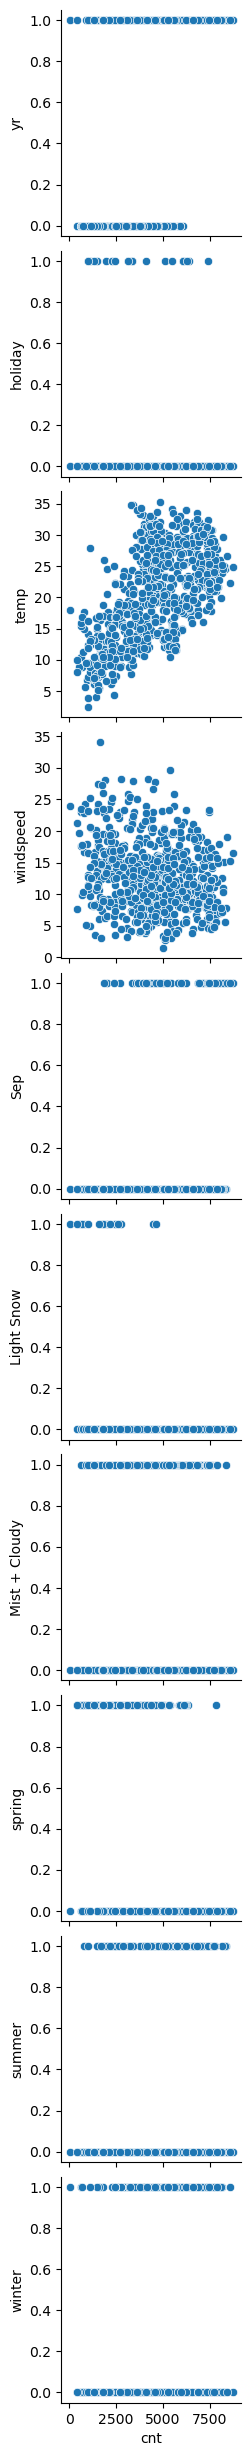

<Figure size 1600x1200 with 0 Axes>

In [240]:
#build a scatter plot to observe relationship between the dependent and the feature variables

sns.pairplot(df, y_vars=X_train_lr5.columns, x_vars='cnt')
plt.figure(figsize = (16, 12))
plt.show()

**We can now validate the assumptions of linear regression in the model:**

As we can see, temperature has a linear relationship with the dependent variable (cnt).

As we have observed earlier every variable in our chosen model has a VIF<5 which ensures that there is no mulitcollinearity.

The error distribution as observed above is normal (ie concentrated around 0) which is another assumption of linear regression.

## Step 5 - Model Evaluation and Prediction

In [242]:
#r2 score of the test set
r2_test = r2_score(y_true=y_test, y_pred=y_pred)
print('r2 score on the test set is', r2_test)

r2 score on the test set is 0.8038195990728842


In [243]:
#r2 score of the training set
r2_train = r2_score(y_true=y_train, y_pred= y_train_pred)
print('r2 score on the train set is', r2_train)

r2 score on the train set is 0.8327073211549112


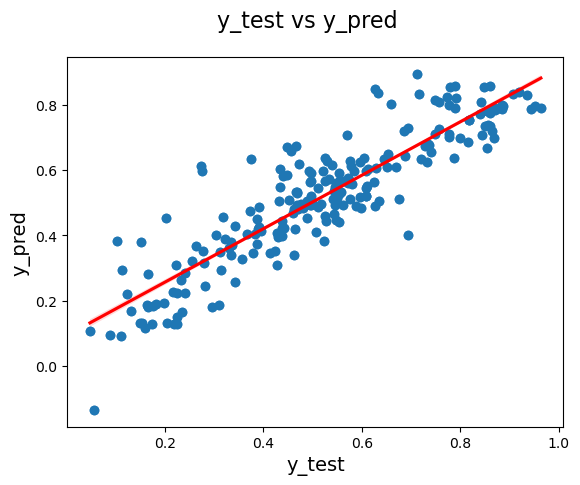

In [244]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=52, fit_reg=True, line_kws={"color": "red"})
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 16)               
plt.xlabel('y_test', fontsize = 14)                          
plt.ylabel('y_pred', fontsize = 14) 
plt.show()

In [245]:
#finding out the mean squared error 

train_mse = (mean_squared_error(y_true=y_train, y_pred=y_train_pred))
test_mse = (mean_squared_error(y_true=y_test, y_pred=y_pred))
print('Mean squared error of the train set is', train_mse)
print('Mean squared error of the test set is', test_mse)

Mean squared error of the train set is 0.008409128123522075
Mean squared error of the test set is 0.009380224523815582


Since our model's mean squared error is almost 0, it implies that our model accurately predicts the variance between in both the test and train datasets

### Summary:

The summary of the model after data interpretation, visualisation, data-preparation, model building and training, residual analysis and evaluation of test model are as follows-

1) The R-squared value of the train set is 83.27% whereas the test set has a value of 80.3% which suggests that our model broadly explains the variance quite accurately on the test set and thus we can conclude that it is a good model. 

2) Our developed model's mean squared error is almost 0 on both the training and testing datasets which suggests that the variance is accurately predicted on the test set. The p-values and VIF were used to select the significant variables. RFE was also conducted for automated selection of variables.  

3) We can conclude that the bike demands for the BoomBikes is company is dependent on the temperature and whether it is a workingday or not. Additionally more rentals seem to be demanded on the winters as compared to the summer and spring. We had observed that the months of September and October had higher use of rentals. In terms of days the maximum focus was on days like Wed, Thurs and Sat and more on holidays. 

4) These interpretations help us derive meaningful insights in the bike rental market and the behaviour of the people. One of the recommendations based on this model are that there should be aggressive marketing in the summer and spring season to drive up rentals. Since the summer months also show low rental levels, a strong marketing strategy for the first 6 months of the year can assist in driving up the rental numbers. There has to be an approach required to introduce more users on days where the weather is less clear, perhaps with incentives or strategic deals. Rentals were more in 2019 than 2018 which suggests that over time more people would be exposed to this idea and there has to a strong analysis done to retain the repeat customers. 